### 어쩌다 데이터 분석
- 214 ~ 279
- 복습 및 데이터셋에 적용
- bank 데이터에 가설 세우고 데이터 집계 및 그룹 연산

In [2]:
import pandas as pd
data1 = pd.DataFrame({'지역': ['평양', '부산', '전주'],
                     '음식': ['냉면', '밀면', '비빔밥']})
data1

,지역,음식
0,평양,냉면
1,부산,밀면
2,전주,비빔밥


In [34]:
data2 = pd.DataFrame({'지역': ['제주', '도쿄', '삿포로', '전주'],
                     '인기음식': ['귤', '라멘', '맥주', '비빔밥']})
data2

,지역,인기음식
0,제주,귤
1,도쿄,라멘
2,삿포로,맥주
3,전주,비빔밥


In [35]:
pd.concat([data1, data2], ignore_index = True) #세로로 연결 - concat

,지역,음식,인기음식
0,평양,냉면,NaN
1,부산,밀면,NaN
2,전주,비빔밥,NaN
3,제주,NaN,귤
4,도쿄,NaN,라멘
5,삿포로,NaN,맥주
6,전주,NaN,비빔밥


In [36]:
pd.concat([data1, data2], axis = 1) # 가로로 연결 - concat

,지역,음식,지역,인기음식
0,평양,냉면,제주,귤
1,부산,밀면,도쿄,라멘
2,전주,비빔밥,삿포로,맥주
3,NaN,NaN,전주,비빔밥


In [37]:
data1.append(data2, ignore_index = True) #세로로 연결 - append

C:\Users\User\AppData\Local\Temp\ipykernel_13160\393695526.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1.append(data2, ignore_index = True) #세로로 연결 - append


,지역,음식,인기음식
0,평양,냉면,NaN
1,부산,밀면,NaN
2,전주,비빔밥,NaN
3,제주,NaN,귤
4,도쿄,NaN,라멘
5,삿포로,NaN,맥주
6,전주,NaN,비빔밥


In [38]:
pd.merge(data1, data2, how = 'outer') #세로로 연결 - merge

,지역,음식,인기음식
0,평양,냉면,NaN
1,부산,밀면,NaN
2,전주,비빔밥,비빔밥
3,제주,NaN,귤
4,도쿄,NaN,라멘
5,삿포로,NaN,맥주


In [39]:
data1.join(data2, lsuffix = '_left', rsuffix = '_right') #가로로 연결 - join

,지역_left,음식,지역_right,인기음식
0,평양,냉면,제주,귤
1,부산,밀면,도쿄,라멘
2,전주,비빔밥,삿포로,맥주


In [40]:
# 가로로 연결 - join
data1.join(data2.set_index('지역'), on = '지역', how = 'outer')

,지역,음식,인기음식
0.0,평양,냉면,NaN
1.0,부산,밀면,NaN
2.0,전주,비빔밥,비빔밥
NaN,제주,NaN,귤
NaN,도쿄,NaN,라멘
NaN,삿포로,NaN,맥주


In [23]:
import numpy as np

menu1 = pd.DataFrame({'지역': ['제주', '제주', '부산', '부산', '대전'],
                    '음식': [np.nan, '고기국수', '밀면', '돼지국밥', '빵']})
menu2 = pd.DataFrame({'지역': ['제주', '제주', '부산', np.nan, '대전'],
                    '음식': ['귤', '고기국수', '밀면', '돼지국밥', '빵']})

In [24]:
menu1.combine_first(menu2) #결측값 채우기

,지역,음식
0,제주,귤
1,제주,고기국수
2,부산,밀면
3,부산,돼지국밥
4,대전,빵


In [25]:
np.where(pd.isnull(menu1), menu2, menu1) #결측값 채우기

array([['제주', '귤'],
       ['제주', '고기국수'],
       ['부산', '밀면'],
       ['부산', '돼지국밥'],
       ['대전', '빵']], dtype=object)

In [26]:
coffee = pd.DataFrame([[4000, 40], [3500, 25], [2000, 10]],
                     index = ['스타벅스', '커피빈', '메가커피'],
                     columns = ['가격', '매장 규모'])
coffee

,가격,매장 규모
스타벅스,4000,40
커피빈,3500,25
메가커피,2000,10


In [27]:
# 컬럼을 인덱스로 변경
coffee.stack()

스타벅스  가격       4000
      매장 규모      40
커피빈   가격       3500
      매장 규모      25
메가커피  가격       2000
      매장 규모      10
dtype: int64

In [28]:
coffee.stack().unstack() #원상태로 변환

,가격,매장 규모
스타벅스,4000,40
커피빈,3500,25
메가커피,2000,10


In [45]:
data1 = pd.DataFrame({'재료': [['계란', '설탕'], ['버터', '핫케잌가루', '계란']],
                     '음식': ['머랭', '핫케잌']})
data1

,재료,음식
0,"[계란, 설탕]",머랭
1,"[버터, 핫케잌가루, 계란]",핫케잌


In [46]:
# 재료 컬럼 분리하기
data1.explode('재료')

,재료,음식
0,계란,머랭
0,설탕,머랭
1,버터,핫케잌
1,핫케잌가루,핫케잌
1,계란,핫케잌


In [50]:
menu1 = pd.DataFrame({'지역': ['제주', '제주', '부산', '부산', '대전'],
                    '음식': ['한라봉', '고기국수', '밀면', '순대국밥', '딸기']})
menu2 = pd.DataFrame({'지역': ['제주', '제주', '부산', np.nan, '대전'],
                    '음식': ['귤', '고기국수', '밀면', '돼지국밥', '빵']})

In [52]:
menu = pd.concat([menu1, menu2], ignore_index = True)
menu

,지역,음식
0,제주,한라봉
1,제주,고기국수
2,부산,밀면
3,부산,순대국밥
4,대전,딸기
5,제주,귤
6,제주,고기국수
7,부산,밀면
8,NaN,돼지국밥
9,대전,빵


In [54]:
# 합친 데이터에서 중복 확인
menu.duplicated().value_counts()

False    8
True     2
dtype: int64

In [56]:
# 합친 데이터에서 중복 삭제
menu.drop_duplicates()

,지역,음식
0,제주,한라봉
1,제주,고기국수
2,부산,밀면
3,부산,순대국밥
4,대전,딸기
5,제주,귤
8,NaN,돼지국밥
9,대전,빵


In [58]:
# 차이 비교
menu1.compare(menu2, keep_equal = True)

지역          음식      
  self other  self other
0   제주    제주   한라봉     귤
3   부산   NaN  순대국밥  돼지국밥
4   대전    대전    딸기     빵

In [61]:
menu1 = pd.DataFrame({'지역': ['제주', '제주', '부산', '부산', '대전'],
                    '음식': ['한라봉', '고기국수', '밀면', '순대국밥', '빵']})
menu2 = pd.DataFrame({'지역': ['제주', '부산', '부산', '대전'],
                    '음식': ['한라봉', '밀면', '순대국밥', '빵']})

In [63]:
# 길이가 다른 두 데이터프레임 비교
menu2[menu1.eq(menu2).all(axis = 1) == False]

C:\Users\User\AppData\Local\Temp\ipykernel_13160\2648943230.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  menu2[menu1.eq(menu2).all(axis = 1) == False]


,지역,음식
1,부산,밀면
2,부산,순대국밥
3,대전,빵


In [29]:
bank = pd.read_csv("bank-full.csv", sep = ';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [33]:
# job을 기준으로 데이터프레임 재생성
bank.melt(id_vars = ['job'], value_vars = ['month', 'age', 'balance'],
         var_name = 'column', value_name = 'value')

,job,column,value
0,management,month,may
1,technician,month,may
2,entrepreneur,month,may
3,blue-collar,month,may
4,unknown,month,may
...,...,...,...
135628,technician,balance,825
135629,retired,balance,1729
135630,retired,balance,5715
135631,blue-collar,balance,668


### 가설
1. 직업별 연령 평균에 차이가 있을 것이다
2. 파산여부 및 직업에 따른 통장 잔액 평균에 차이가 있을 것이다
3. 직업별 대출의 비율에 차이가 있을 것이다

In [65]:
# 그룹별 집계: 직업별 연령 평균
bank.groupby('job')['age'].mean().sort_values()

job
student          26.542644
services         38.740250
admin.           39.289886
technician       39.314598
blue-collar      40.044081
management       40.449567
self-employed    40.484484
unemployed       40.961627
entrepreneur     42.190989
housemaid        46.415323
unknown          47.593750
retired          61.626767
Name: age, dtype: float64

학생의 평균 연령이 가장 낮고 은퇴한 사람의 평균 연령이 가장 높다.

이외 직업군에는 근소한 차이가 보인다

In [66]:
# 그룹별 집계: 파산여부 및 직업에 따른 평균 통장 잔고
bank.groupby(['default', 'job'])['balance'].mean().sort_values()

default  job          
yes      blue-collar      -214.965174
         housemaid        -213.590909
         self-employed    -210.090909
         management       -161.957317
         services         -152.426667
         retired          -134.730769
         admin.            -95.972973
         unknown           -73.500000
         unemployed        -72.566667
         student           -52.666667
         entrepreneur      -46.600000
         technician        -28.315385
no       services         1018.224075
         blue-collar      1106.111531
         admin.           1153.722778
         technician       1274.933307
         student          1392.683422
         housemaid        1421.403120
         unemployed       1559.318146
         entrepreneur     1581.696229
         self-employed    1687.631953
         unknown          1785.265734
         management       1797.595115
         retired          2008.831993
Name: balance, dtype: float64

파산한 경우는 직업에 관계없이 통장 잔고의 평균액이 전부 마이너스인 것을 알 수 있다.


파산 여부가 동일하더라도 통장 잔고의 평균액은 직업군에 따라 크게 2배(파산X, services - retired)에서 9배(파산O, bluecollar - technician)까지 차이가 나는 것을 볼 수 있다.

In [67]:
default = bank.groupby(['default', 'job'])['balance'].mean().sort_values()
default.unstack() #데이터프레임으로 변환

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
default,,,,,,,,,,,,
no,1153.722778,1106.111531,1581.696229,1421.403120,1797.595115,2008.831993,1687.631953,1018.224075,1392.683422,1274.933307,1559.318146,1785.265734
yes,-95.972973,-214.965174,-46.600000,-213.590909,-161.957317,-134.730769,-210.090909,-152.426667,-52.666667,-28.315385,-72.566667,-73.500000


In [110]:
def binary_percent(df, col, col2): #범주가 2개인 범주형 변수를 넣으면 비율을 계산
    if df[col].nunique() == 2:
        # yes를 1로, no를 0으로 변환
        df[col] = [1 if j == 'yes' else 0 for i,j in enumerate(df[col])]
        output = df.groupby(col2).agg(percent = (col, 'mean')).sort_values(by = 'percent')
    else:
        print("Can't run the function")
    return output

In [112]:
binary_percent(bank, 'loan', 'job')

,percent
job,
student,0.012793
unknown,0.013889
unemployed,0.083653
housemaid,0.122581
management,0.132480
retired,0.136484
self-employed,0.145028
technician,0.172305
blue-collar,0.173037


직업별로 대출의 비율에 차이가 있는 것으로 나타났다. 

고정된 수입이 없는 student의 대출 비율이 가장 낮았고(은행에서 대출이 불가한 것으로 예측) 사업을 위해 많은 자금이 필요한 entrepreneur의 대출 비율이 가장 높은 것으로 나타났다.

In [115]:
bank.groupby('job')['balance'].describe() #직업별 기술통계량

,count,mean,std,min,25%,50%,75%,max
job,,,,,,,,
admin.,5171.0,1135.838909,2641.962686,-1601.0,63.00,396.0,1203.00,64343.0
blue-collar,9732.0,1078.826654,2240.523208,-8019.0,55.00,388.0,1203.00,66653.0
entrepreneur,1487.0,1521.470074,4153.442626,-2082.0,44.50,352.0,1341.00,59649.0
housemaid,1240.0,1392.395161,2984.692098,-1941.0,57.75,406.0,1382.75,45141.0
management,9458.0,1763.616832,3822.965605,-6847.0,98.00,572.0,1825.00,102127.0
retired,2264.0,1984.215106,4397.044177,-1598.0,164.50,787.0,2309.00,81204.0
self-employed,1579.0,1647.970868,3684.259573,-3313.0,120.00,526.0,1603.50,52587.0
services,4154.0,997.088108,2164.493505,-2122.0,35.00,339.5,1071.75,57435.0
student,938.0,1388.060768,2441.703526,-679.0,148.25,502.0,1579.75,24025.0


In [116]:
#교육수준 및 결혼여부, 마케팅 동의여부에 따른 나이 및 통장잔고 평균
bank.pivot_table(values = ['balance', 'age'],
                index = ['education', 'marital'],
                columns = 'y')

age                 balance             
y                          no        yes           no          yes
education marital                                                 
primary   divorced  50.165123  59.778846  1084.950617  1466.230769
          married   45.982062  53.515152  1230.597526  1973.224747
          single    37.014436  33.967033  1053.438320  1782.494505
secondary divorced  43.889065  47.195876   863.653328  1242.075601
          married   42.071394  45.151840  1197.077009  1774.416411
          single    33.394308  31.559064  1044.505727  1168.650292
tertiary  divorced  45.196372  46.886700  1579.911672  2456.753695
          married   42.011592  44.281490  1818.701878  2050.558598
          single    34.033998  32.860227  1542.967536  2089.602273
unknown   divorced  49.434483  48.458333  1308.944828  2070.875000
          married   47.517682  53.802817  1469.914538  2187.753521
          single    35.477376  30.593023  1327.018100  2350.104651

In [117]:
#결혼여부, 마케팅 동의여부에 따른 나이 평균 및 통장잔고 최소값, 최대값, 평균
bank.pivot_table(values = ['balance', 'age'],
                index = ['marital'],
                columns = 'y',
                aggfunc = {'balance': [min, max, np.mean], 'age': np.mean})

age            balance                                         \
               mean                max                mean                min   
y                no        yes      no    yes           no          yes    no   
marital                                                                         
divorced  45.312977  49.247588   66721  52587  1107.095747  1707.964630 -4057   
married   43.058547  46.511434   98417  81204  1370.746228  1915.810163 -6847   
single    33.962585  32.229079  102127  45248  1235.869921  1674.875523 -8019   

                
                
y          yes  
marital         
divorced  -824  
married  -3058  
single   -1129

In [120]:
# 결혼 여부와 직업의 빈도
pd.crosstab(index = bank.marital, columns = bank.job, margins = True)

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown,All
marital,,,,,,,,,,,,,
divorced,750,750,179,184,1111,425,140,549,6,925,171,17,5207
married,2693,6968,1070,912,5400,1731,993,2407,54,4052,731,203,27214
single,1728,2014,238,144,2947,108,446,1198,878,2620,401,68,12790
All,5171,9732,1487,1240,9458,2264,1579,4154,938,7597,1303,288,45211


### 혼자 공부하는 데이터 분석
- 254 ~ 300
- 복습 및 와인 데이터에 적용: 비교 및 시각화
- 시각화 후 인사이트 정리 진행

In [13]:
wine_red = pd.read_csv('winequality-red.csv', sep = ';')
wine_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
wine_white = pd.read_csv('winequality-white.csv', sep = ';')
wine_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [15]:
wine_red['type'] = "red"
wine_white['type'] = "white"
wine = pd.concat([wine_red, wine_white])
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


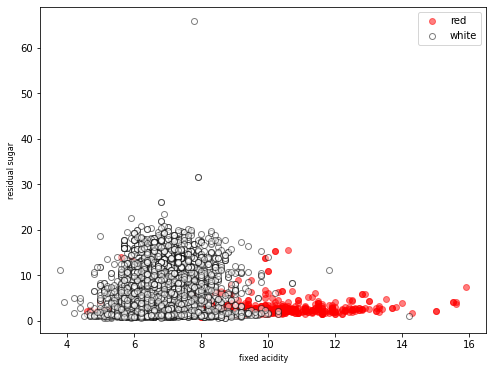

In [76]:
import matplotlib.pyplot as plt

# 산점도 그리기: 결합산와 당도
plt.rcParams['scatter.marker'] = 'o'
plt.figure(figsize = (8,6))

plt.scatter(wine[wine['type'] == "red"]['fixed acidity'], wine[wine['type'] == "red"]['residual sugar'], 
            label = 'red', color = 'red', alpha = 0.5)
plt.scatter(wine[wine['type'] == "white"]['fixed acidity'], wine[wine['type'] == "white"]['residual sugar'], 
            label = 'white', color = 'white', edgecolors = 'black', linewidth = 1, alpha = 0.5)
plt.legend(loc = 'upper right')
plt.xlabel('fixed acidity', size = 8)
plt.ylabel('residual sugar', size = 8)
plt.show()

화이트 와인은 결합산이 10 이하인 경우에 주로 분포하며, 레드 와인은 결합산이 비교적 고르게 분포되어 있는 것을 알 수 있다. 

또한, 레드와인은 전반적으로 당도가 낮으며 화이트와인의 당도가 비교적 고르게 분포되어 있는 것을 알 수 있다.

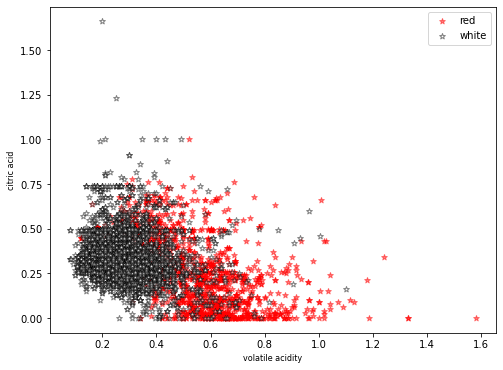

In [77]:
# 산점도 그리기: 아세트산과 유기산
plt.rcParams['scatter.marker'] = '*'
plt.figure(figsize = (8,6))

plt.scatter(wine[wine['type'] == "red"]['volatile acidity'], wine[wine['type'] == "red"]['citric acid'], 
            label = 'red', color = 'red', alpha = 0.5)
plt.scatter(wine[wine['type'] == "white"]['volatile acidity'], wine[wine['type'] == "white"]['citric acid'], 
            label = 'white', color = 'white', edgecolors = 'black', linewidth = 1, alpha = 0.5)
plt.legend(loc = 'upper right')
plt.xlabel('volatile acidity', size = 8)
plt.ylabel('citric acid', size = 8)
plt.show() #약한 음의 상관관계

화이트 와인은 레드와인에 비해 아세트산도가 낮으며, 분산이 작은 것으로 나타났다. 

반면, 레드와인은 화이트와인에 비해 유기산도가 낮으며, 분산이 큰 것으로 나타났다. 

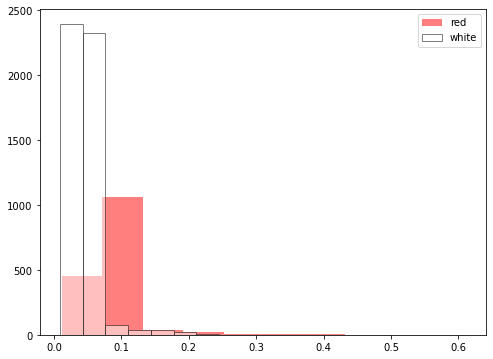

In [83]:
# 히스토그램: 염기성
plt.figure(figsize = (8,6))
plt.hist(wine[wine['type'] == "red"]['chlorides'], color = 'red', 
         label = 'red', alpha = 0.5)
plt.hist(wine[wine['type'] == "white"]['chlorides'], color = 'white', 
         edgecolor = 'black', linewidth = 1, label = 'white', alpha = 0.5)
plt.legend(loc = 'upper right', fontsize = 10)
plt.show()

와인 종류별로 염기성의 분포를 확인한 결과, 화이트와인의 염기성은 대부분 낮은 것으로 나타났다. 레드와인의 염기성은 비교적 고르게 퍼져있다.

In [85]:
import numpy as np

# 경계값 확인
print("레드와인 히스토그램 경계값 : \n", 
      np.histogram_bin_edges(wine[wine['type'] == "red"]['chlorides']))
print("화이트와인 히스토그램 경계값 : \n", 
      np.histogram_bin_edges(wine[wine['type'] == "white"]['chlorides']))

레드와인 히스토그램 경계값 : 
 [0.012  0.0719 0.1318 0.1917 0.2516 0.3115 0.3714 0.4313 0.4912 0.5511
 0.611 ]
화이트와인 히스토그램 경계값 : 
 [0.009  0.0427 0.0764 0.1101 0.1438 0.1775 0.2112 0.2449 0.2786 0.3123
 0.346 ]


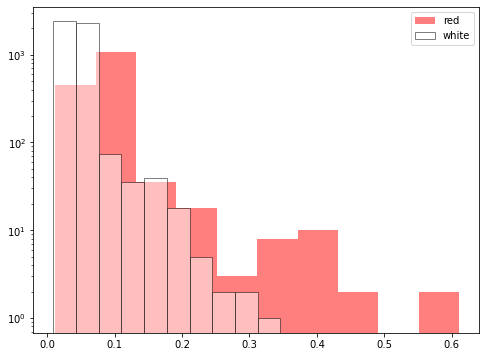

In [86]:
# 로그 스케일로 바꾸어 히스토그램 그리기
plt.figure(figsize = (8,6))
plt.hist(wine[wine['type'] == "red"]['chlorides'], color = 'red', 
         label = 'red', alpha = 0.5)
plt.hist(wine[wine['type'] == "white"]['chlorides'], color = 'white', 
         edgecolor = 'black', linewidth = 1, label = 'white', alpha = 0.5)
plt.legend(loc = 'upper right', fontsize = 10)
plt.yscale('log')
plt.show()

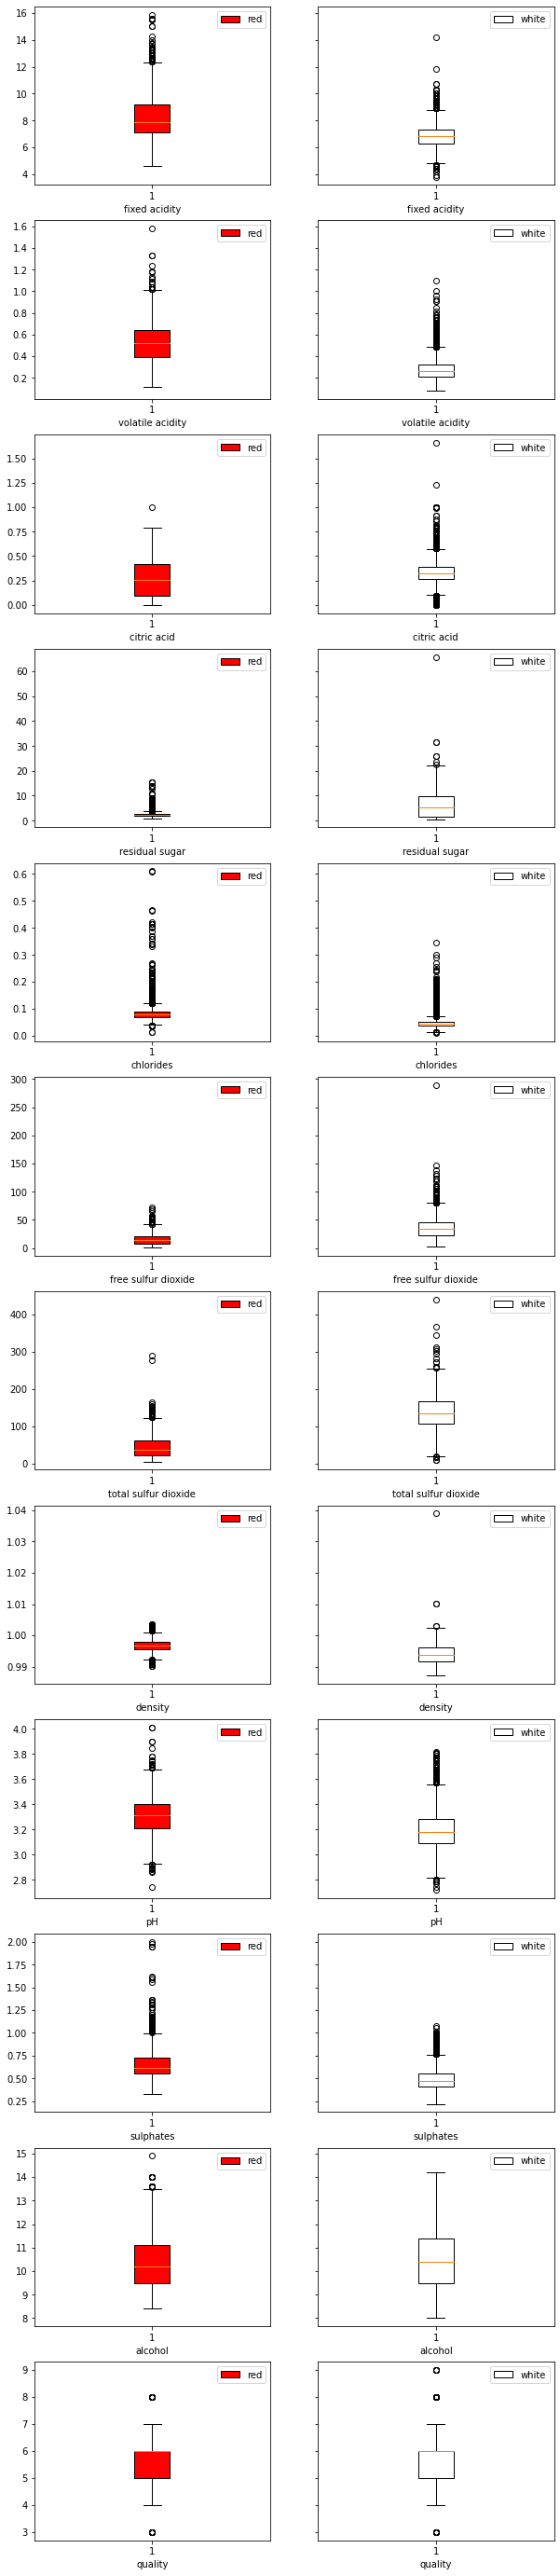

In [116]:
# 상자수염 그림
fig, ax = plt.subplots(nrows = 12, ncols = 2, sharey = 'row', figsize = (10, 50))

for i in range(0,12):
    a = list(wine.select_dtypes(np.number).columns)[i]
    for j in range(0,2):
        if j == 0:
            ax[i,j].boxplot(wine[wine['type'] == "red"][a], 
                           patch_artist = True, boxprops = dict(facecolor = 'red'))
            ax[i,j].set_xlabel(a, fontsize = 10)
            ax[i,j].legend(['red'], loc = 'upper right')
        else:
            ax[i,j].boxplot(wine[wine['type'] == "white"][a],
                           patch_artist = True, boxprops = dict(facecolor = 'white'))
            ax[i,j].set_xlabel(a, fontsize = 10)
            ax[i,j].legend(['white'], loc = 'upper right')

plt.show()

와인 종류별로 상자그림을 그려 분포를 비교했다.

1. fixed acidity: 레드와인의 중앙값이 화이트와인보다 높았으며, 레드와인의 분산이 더 큰 것을 알 수 있다.
2. volatile acidity: 레드와인의 중앙값이 화이트와인보다 높았으며, 레드와인의 분산이 더 큰 것을 알 수 있다.
3. critic acid: 화이트와인의 중앙값이 더 높았으며, 분산의 경우 레드와인이 더 큰 것으로 보인다
4. residual sugar: 화이트와인의 중앙값이 더 높았으며 고르게 분포되어 있다. 
5. chlorides: 레드와인의 중앙값이 크며, 두 와인 모두 다른 피처에 비해 이상값이 많이 보인다.
6. free sulfur dioxide: 화이트와인의 중앙값과 분산이 더 큰 것으로 보인다
7. total sulfur dioxide: 화이트와인의 중앙값과 분산이 더 큰 것으로 보인다.
8. density: 레드와인의 중앙값이 더 크며, 분산의 경우 화이트와인이 더 큰 것으로 보인다.
9. pH: 레드와인의 중앙값이 더 크다.
10. sulphates: 레드와인의 중앙값이 더 크다.
11. alcohol: 화이트와인의 분산이 더 크며, 12개의 피처 중 유일하게 이상치가 없다
12. quality: 두 와인 모두 중앙값과 Q3이 일치한다.